In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly as py
from plotly import tools
import os
import seaborn as sns 

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
data = pd.read_csv("C:\DATA SCIENCE\Capston Project\EDA-20221109T114824Z-001\EDA\crop_production.csv")
data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [5]:
data.shape

(246091, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


# Checking for null values

In [7]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
data.Crop.value_counts()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [9]:
data.Season.value_counts()

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [12]:
data.describe()

Crop_Year          Area    Production
count  242361.000000  2.423610e+05  2.423610e+05
mean     2005.625773  1.216741e+04  5.825034e+05
std         4.958285  5.085744e+04  1.706581e+07
min      1997.000000  1.000000e-01  0.000000e+00
25%      2002.000000  8.700000e+01  8.800000e+01
50%      2006.000000  6.030000e+02  7.290000e+02
75%      2010.000000  4.545000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09

# Exploratory Data Analysis

# checking for outliers

C:\Users\pares\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Production'>

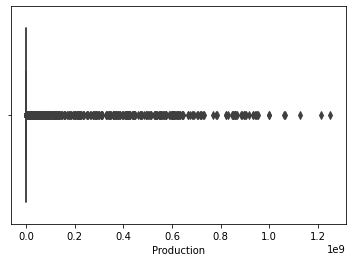

In [13]:
sns.boxplot(data['Production'])

C:\Users\pares\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Area'>

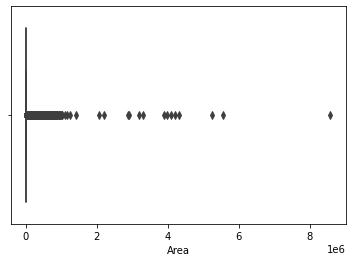

In [14]:
sns.boxplot(data['Area'])

# checking for correlation between variables

<AxesSubplot:>

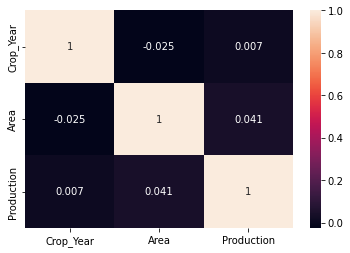

In [15]:
plt.tick_params(labelsize=10)
sns.heatmap(data.corr(),annot = True)

There is no variable showing high correlation with any other variable in the dataset.

# overall production by state

In [16]:
#state wise production:
Production = data.groupby(by = "State_Name")['Production'].sum().reset_index().sort_values(by = "Production")
px.bar(Production,"State_Name","Production")

Kerala is the highest crops producing state overall. It had produced more than it's runner up state Andhra Pradesh.

# District wise crop production

In [17]:
data_1 = data.groupby(by = 'District_Name')['Production'].sum().reset_index().sort_values(by = 'Production')

In [18]:
data_1.head()

District_Name  Production
397        MUMBAI         2.0
415        NAMSAI       794.0
238     HYDERABAD      3835.0
314        KHUNTI      5024.0
486       RAMGARH      5472.0

District having highest crop production

In [19]:
Highest_Prod = data_1.tail()
temp1 = px.bar(Highest_Prod, x = "District_Name",y = "Production",title = "Highest crop production district")
temp1.show()

District having lowest crop production

In [20]:
Lowest_Prod = data_1.head()
temp2 = px.bar(Lowest_Prod,x='District_Name',y= 'Production',title = 'Lowest crop production district')
temp2.show()

# Yearly crop production  

In [21]:
Yearly = data.groupby("Crop_Year")["Production"].agg("sum")
temp3 = px.bar(Yearly, y = 'Production')
temp3.show()

Highest production years are 2006, 2011, 2013, 2014

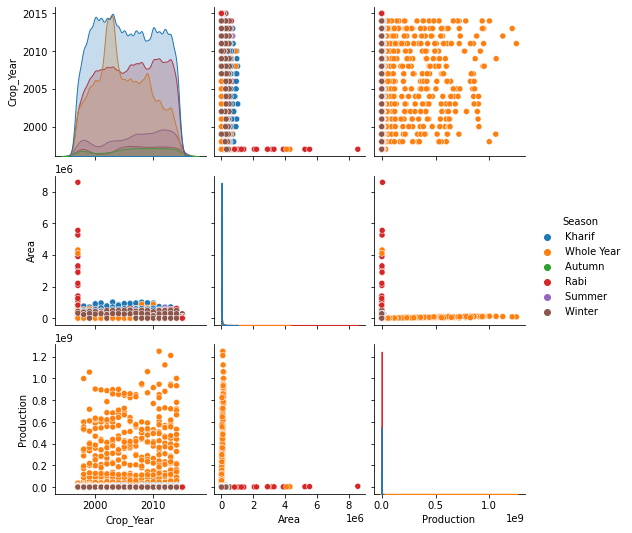

In [52]:
sns.pairplot(data,hue='Season')

# Area under Agriculture state- wise

In [22]:
Area_Under_state_wise = data.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by = 'Area')
temp4 = px.bar(Area_Under_state_wise, x = 'State_Name',y = 'Area',color = 'Area')
temp4.show()

Uttar Pradesh have larger area under agriculture
followed by Madhya Pradesh and Maharastra
Chandigarh have the lowest area under agriculter

# Area Under Agriculture Over the Years 

In [23]:
Area_Agriculture_yearly = data.groupby(by = 'Crop_Year')['Area'].mean().reset_index()
px.line(Area_Agriculture_yearly,'Crop_Year','Area', markers = True, title = 'Area under Agriculture by year')


As we can see by the year the Area Under Agriculture is coming down gradually.

# Seasonal Production in India 

In [24]:
Production_india = data.groupby(by = 'Season')['Production'].sum()
temp5 = px.bar(Production_india)
temp5.show()

We can see that most of the production in india is are the Crops that can be grow whole year

# Top Crops that are produced in India

In [25]:
India_crops = data.groupby(by = 'Crop')['Production'].sum().reset_index().sort_values(by = 'Production')
px.bar(India_crops.tail(5),'Crop','Production',color  = 'Production')

# Crop types Cultivated In India

In [26]:
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop == i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop == i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop == i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
        if crop==i:
            return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

In [27]:
crops = data['Crop']
data['cat_crop'] = data['Crop'].apply(cat_crop)

In [28]:
data['Crop'].apply(lambda x : cat_crop(x))

0               Nuts
1             Pulses
2             Cereal
3             Fruits
4               Nuts
             ...    
246086        Cereal
246087      oilseeds
246088    Commercial
246089        Cereal
246090      oilseeds
Name: Crop, Length: 242361, dtype: object

In [29]:
data.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production cat_crop  
0             Arecanut  1254.0      2000.0     Nuts  
1  Other Kharif pulses     2.0         1.0   Pulses  
2                 Rice   102.0       321.0   Cereal  
3               Banana   176.0       641.0   Fruits  
4            Cashewnut   720.0       165.0     Nuts

In [30]:
Production_Cat_crop = data.groupby('cat_crop')['Production'].agg('count')
temp6 = px.bar(Production_Cat_crop,y = 'Production',title = 'Crop wise Production in India')
temp6.show()

Top crop categories are Cereal, Pulses and Oilseeds.

# Different proportion of Crop Categories for India

<AxesSubplot:ylabel='cat_crop'>

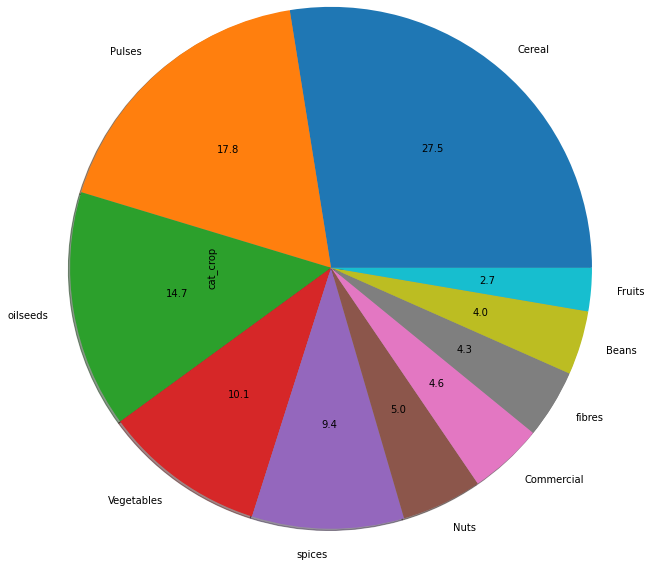

In [31]:
df1 = data['cat_crop'].value_counts()
df1.plot(radius = 3, kind = 'pie',autopct = '%1.1f',pctdistance = 0.6,shadow = True)

In [32]:
temp_1 = data.groupby(by = 'Crop_Year')['Area'].mean().reset_index()
temp_12 = data.groupby(by = 'Crop_Year')['Production'].sum().reset_index()
df = pd.merge(temp_1,temp_12, right_index = False,left_index = False)

In [33]:
df

Crop_Year          Area    Production
0        1997  26038.324081  8.512329e+08
1        1998  14795.911383  5.825321e+09
2        1999  12749.174021  6.434666e+09
3        2000  12195.811997  7.449709e+09
4        2001  12434.568019  7.465541e+09
5        2002   9514.310063  7.696955e+09
6        2003   9905.217197  7.917974e+09
7        2004  12105.398306  8.189462e+09
8        2005  12051.210715  8.043757e+09
9        2006  12205.838055  8.681913e+09
10       2007  10700.722146  6.879442e+09
11       2008  12013.561841  7.717018e+09
12       2009  12029.417665  7.660494e+09
13       2010  12803.725932  6.307609e+09
14       2011  11138.374385  1.430890e+10
15       2012  11506.241732  8.171055e+09
16       2013  10501.068370  1.290359e+10
17       2014  10702.086481  8.664541e+09
18       2015   8200.174688  6.935065e+06

# Rice

In [34]:
rice_df = data[data['Crop'] == 'Rice']
rice_df

State_Name District_Name  Crop_Year       Season  \
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
12      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
18      Andaman and Nicobar Islands      NICOBARS       2002  Kharif        
27      Andaman and Nicobar Islands      NICOBARS       2003  Kharif        
36      Andaman and Nicobar Islands      NICOBARS       2004  Kharif        
...                             ...           ...        ...          ...   
246049                  West Bengal       PURULIA       2013  Summer        
246052                  West Bengal       PURULIA       2013  Winter        
246058                  West Bengal       PURULIA       2014  Autumn        
246086                  West Bengal       PURULIA       2014  Summer        
246089                  West Bengal       PURULIA       2014  Winter        

        Crop       Area  Production cat_crop  
2       Rice     102.00      321.00   Cereal  
12      Rice      83.00      300.00   Cereal  
18      Rice     189.20      510.84   Cereal  
27      Rice      52.00       90.17   Cereal  
36      Rice      52.94       72.57   Cereal  
...      ...        ...         ...      ...  
246049  Rice     516.00     1274.00   Cereal  
246052  Rice  302274.00   730136.00   Cereal  
246058  Rice     264.00      721.00   Cereal  
246086  Rice     306.00      801.00   Cereal  
246089  Rice  279151.00   597899.00   Cereal  

[15082 rows x 8 columns]

<AxesSubplot:xlabel='Season', ylabel='Production'>

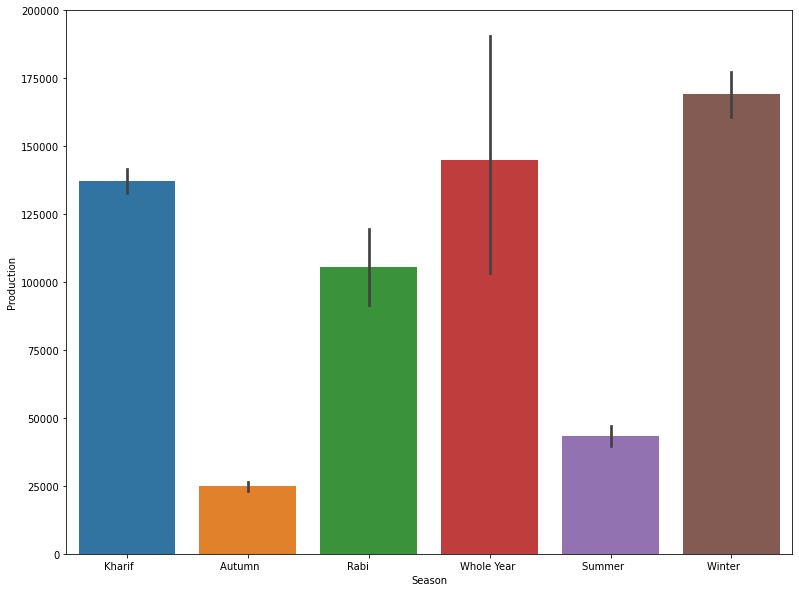

In [35]:
# RiceProduction
plt.figure(figsize = (13,10))
sns.barplot(x = 'Season',y='Production',data = rice_df)

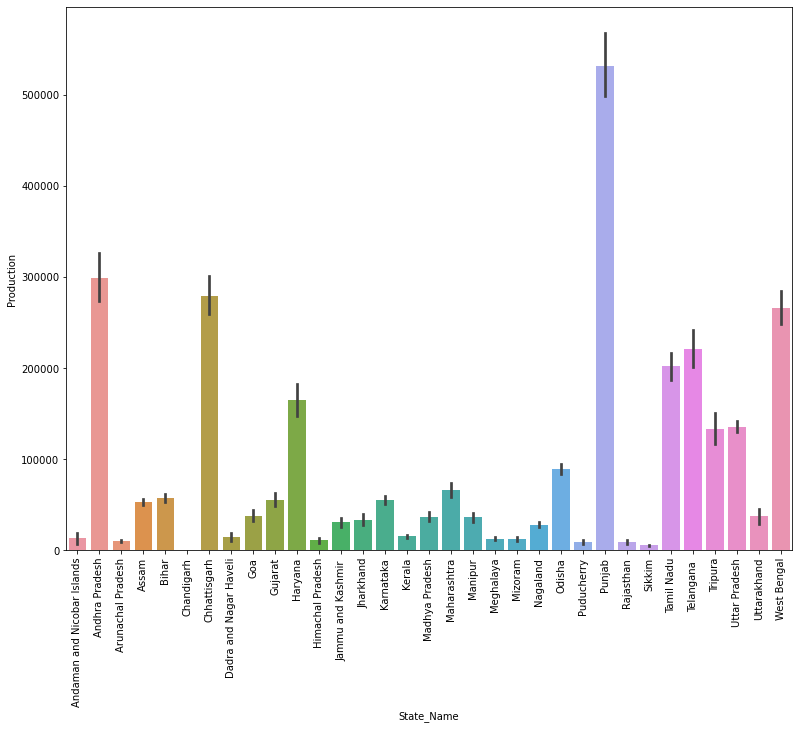

In [36]:
#Rice Production State_wise
plt.figure(figsize=(13,10))
sns.barplot(x = 'State_Name',y = 'Production',data = rice_df)
plt.xticks(rotation = 90)
plt.show()

<Figure size 936x720 with 0 Axes>

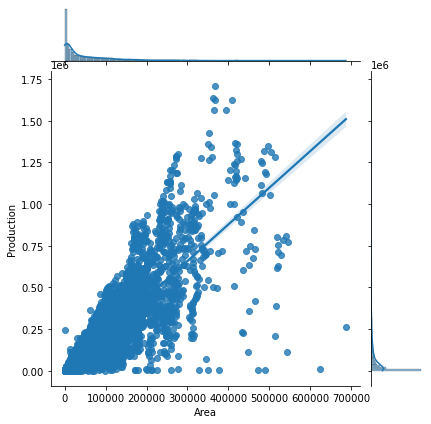

In [37]:
# Area wise Rice Production
plt.figure(figsize = (13,10))
sns.jointplot(x = 'Area',y = 'Production',data = rice_df,kind = 'reg')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

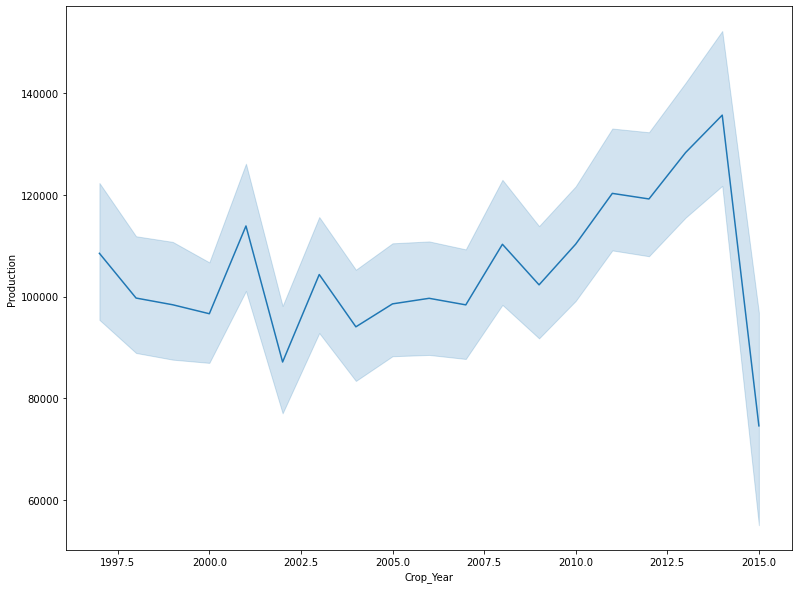

In [38]:
# Rice Production Over the Year:
plt.figure(figsize = (13,10))
sns.lineplot(data = rice_df, x = 'Crop_Year', y = 'Production')

Insight
From Data Visualization: Rice production is mostly depends on Season, Area, State(place).

# Coconut

In [39]:
coco_df = data[data['Crop'] == 'Coconut ']
coco_df

State_Name District_Name  Crop_Year       Season  \
5       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
14      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
23      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
32      Andaman and Nicobar Islands      NICOBARS       2003  Whole Year    
41      Andaman and Nicobar Islands      NICOBARS       2004  Whole Year    
...                             ...           ...        ...          ...   
245719                  West Bengal       PURULIA       2004  Whole Year    
245756                  West Bengal       PURULIA       2005  Whole Year    
245792                  West Bengal       PURULIA       2006  Whole Year    
245837                  West Bengal       PURULIA       2007  Whole Year    
245879                  West Bengal       PURULIA       2008  Whole Year    

            Crop      Area  Production cat_crop  
5       Coconut   18168.00  65100000.0     None  
14      Coconut   18190.00  64430000.0     None  
23      Coconut   18240.00  67490000.0     None  
32      Coconut   18284.74  68580000.0     None  
41      Coconut   18394.70  52380000.0     None  
...          ...       ...         ...      ...  
245719  Coconut      66.00       296.1     None  
245756  Coconut      74.00       311.0     None  
245792  Coconut      73.00    365000.0     None  
245837  Coconut      58.00    898000.0     None  
245879  Coconut      58.00       598.0     None  

[1958 rows x 8 columns]

<AxesSubplot:xlabel='Season', ylabel='Production'>

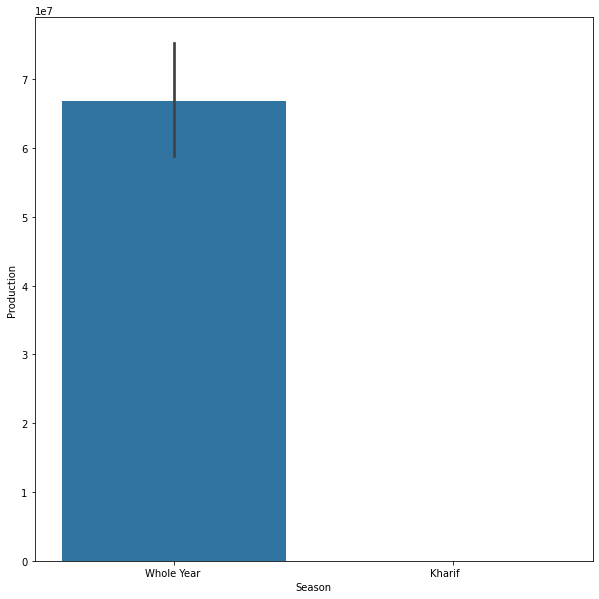

In [40]:
# Season COconut Production
plt.figure(figsize = (10,10))
sns.barplot(x = 'Season',y = 'Production',data = coco_df)

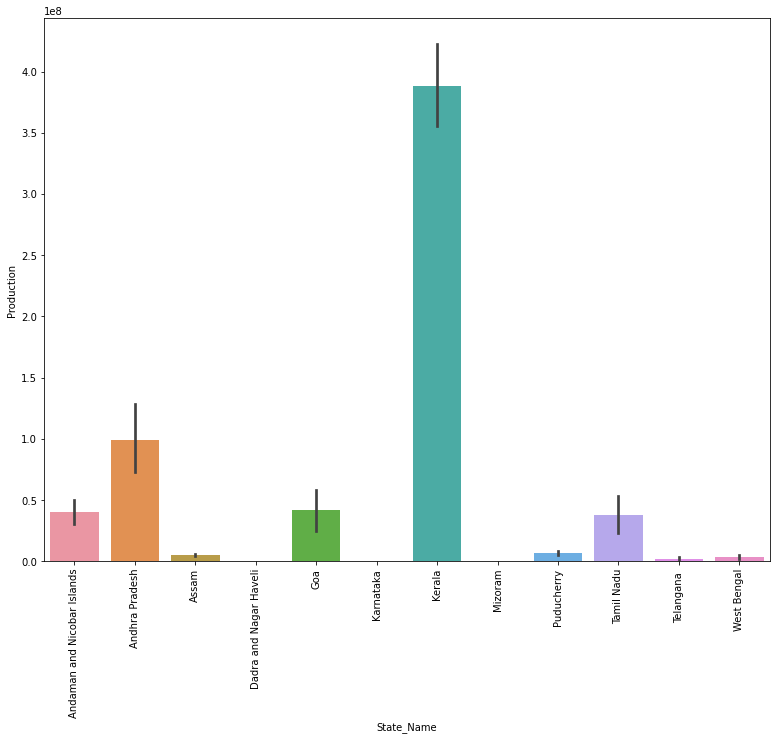

In [41]:
# State-Wise Coconut Production:

plt.figure(figsize=(13,10))
sns.barplot(x = "State_Name",y = "Production",data=coco_df)
plt.xticks(rotation=90)
plt.show()

In [42]:
coco_df.loc[(coco_df['Production'] == 0) & (coco_df['Area'] > 0)]

State_Name District_Name  Crop_Year       Season      Crop  Area  \
186174  Tamil Nadu  THE NILGIRIS       2003  Whole Year   Coconut   52.0   

        Production cat_crop  
186174         0.0     None

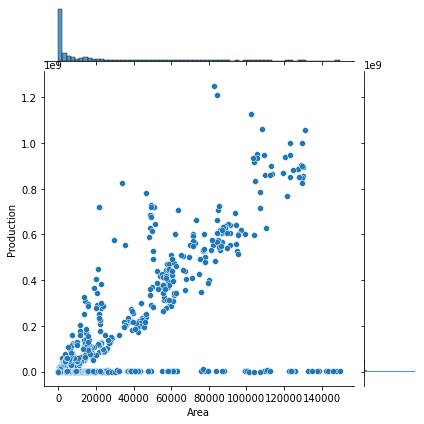

In [43]:
# area wise coconut Production
sns.jointplot(x = 'Area',y = 'Production',data = coco_df,kind = 'scatter')


<AxesSubplot:xlabel='Area', ylabel='Production'>

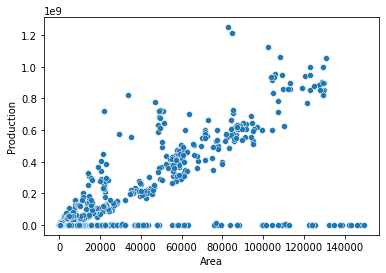

In [44]:
sns.scatterplot(x = 'Area',y = 'Production', data = coco_df)

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

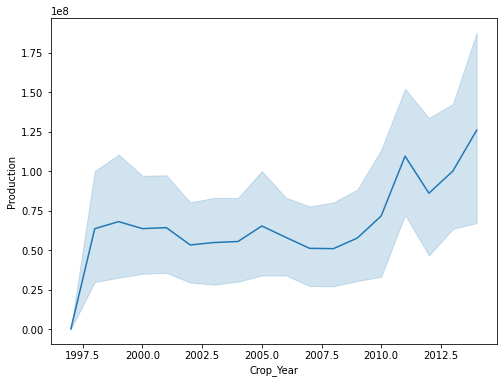

In [45]:
# Cocunut Production Over the Year:

plt.figure(figsize=(8,6))
sns.lineplot(data=coco_df,x='Crop_Year',y='Production')

Insight from Cocunut Production
Cocunut production is directly proportional to area.
Its production is also gradually increasing over a time of period.
Production is highin kerala state.
It does not depends on season.
Production is Increasing by year

# Sugarcane

In [46]:
sugarcane_df = data[data['Crop'] == 'Sugarcane']
sugarcane_df

State_Name District_Name  Crop_Year       Season  \
7       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
16      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
26      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
60      Andaman and Nicobar Islands      NICOBARS       2006  Whole Year    
65      Andaman and Nicobar Islands      NICOBARS       2010  Autumn        
...                             ...           ...        ...          ...   
245953                  West Bengal       PURULIA       2010  Whole Year    
245984                  West Bengal       PURULIA       2011  Whole Year    
246016                  West Bengal       PURULIA       2012  Whole Year    
246051                  West Bengal       PURULIA       2013  Whole Year    
246088                  West Bengal       PURULIA       2014  Whole Year    

             Crop   Area  Production    cat_crop  
7       Sugarcane    1.0        2.00  Commercial  
16      Sugarcane    1.0        1.00  Commercial  
26      Sugarcane    5.0       40.00  Commercial  
60      Sugarcane    0.2        0.50  Commercial  
65      Sugarcane   13.4       41.75  Commercial  
...           ...    ...         ...         ...  
245953  Sugarcane  303.0    11541.00  Commercial  
245984  Sugarcane  303.0    20264.00  Commercial  
246016  Sugarcane  314.0    11199.00  Commercial  
246051  Sugarcane  161.0     7948.00  Commercial  
246088  Sugarcane  324.0    16250.00  Commercial  

[7827 rows x 8 columns]

<AxesSubplot:xlabel='Season', ylabel='Production'>

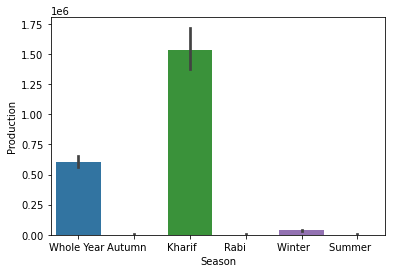

In [47]:
# Sesonal Sugarcane Production:

sns.barplot(x= "Season",y="Production",data=sugarcane_df)

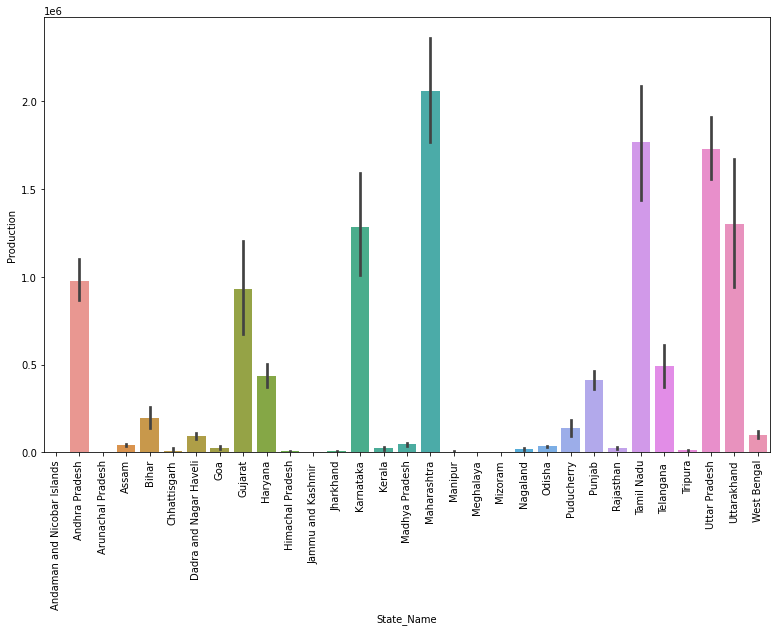

In [48]:
# State Wise Sugarcane Production:

plt.figure(figsize=(13,8))
sns.barplot(x = "State_Name", y = "Production",data=sugarcane_df)
plt.xticks(rotation=90)
plt.show()

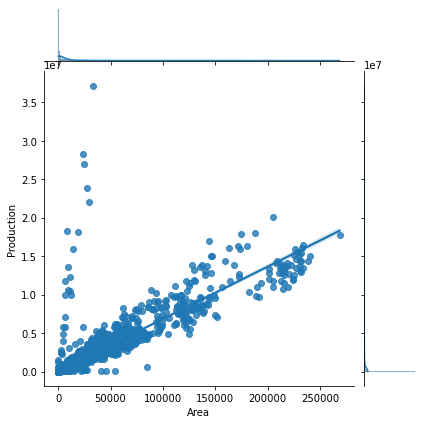

In [49]:
# Area Wise Sugarcane Production:

sns.jointplot(x= "Area",y = "Production",data=sugarcane_df,kind="reg")

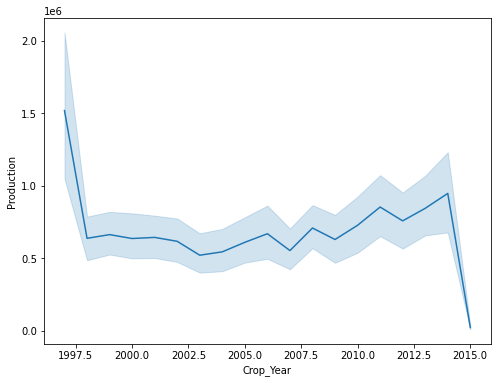

In [50]:
# Sugarcane Production Over the Years:

plt.figure(figsize=(8,6))
sns.lineplot(data=sugarcane_df,x='Crop_Year',y='Production');

Insight from Sugarcane Production:
Sugarecane production is directly proportional to area
And the production is high in some state only
Production is Decreasing over the Year.

array([[<AxesSubplot:title={'center':'Crop_Year'}>,
        <AxesSubplot:title={'center':'Area'}>],
       [<AxesSubplot:title={'center':'Production'}>, <AxesSubplot:>]],
      dtype=object)

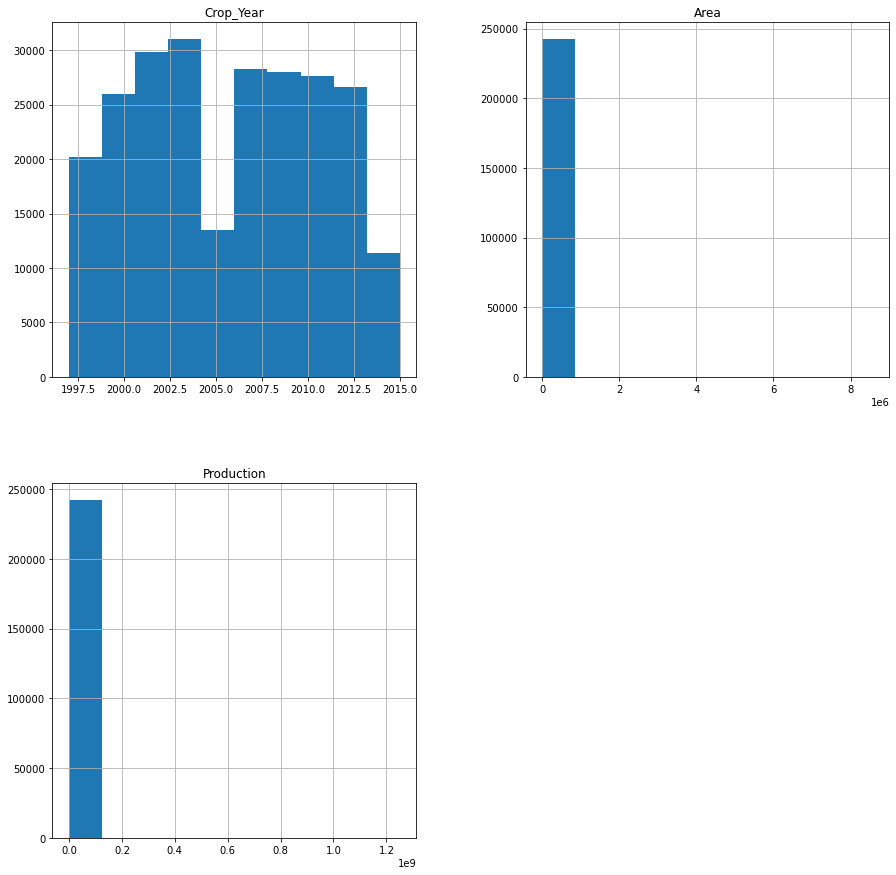

In [54]:
data.hist(figsize = (15,15))

C:\Users\pares\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Crop_Year', ylabel='Density'>

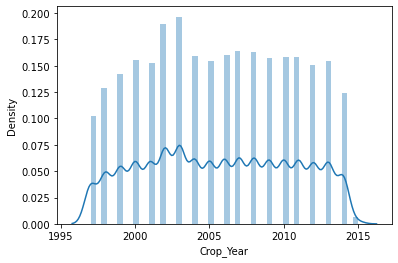

In [55]:
sns.distplot(data['Crop_Year'])

C:\Users\pares\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Production', ylabel='Density'>

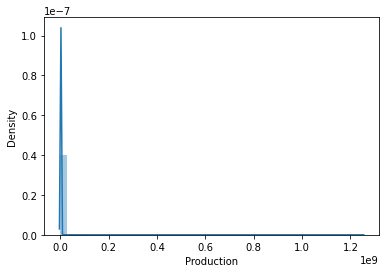

In [56]:
sns.distplot(data['Production'])

C:\Users\pares\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Area', ylabel='Density'>

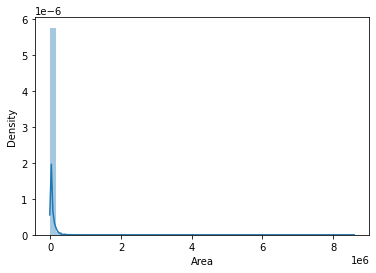

In [58]:
sns.distplot(data['Area'])